# Physik der sozio-ökonomischen Systeme mit dem Computer
# (Physics of Socio-Economic Systems with the Computer)

### Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main 
#### (Wintersemester 2025/26)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 27.10.2025


### Erster Vorlesungsteil:  
#### Klassifizierung evolutionärer Bi-Matrix Spiele ( unsymmetrische ($2\times2$)-Spiele )

## Einführung

In diesem Unterkapitel werden die unterschiedlichen Spieltypen evolutionärer Bi-Matrix Spiele ( unsymmetrische ($2\times2$)-Spiele ) klassifiziert. Ausgangspunkt sind die folgenden allgemeinen Auszahlungsmatrizen der Spielergruppen A und B. Da es sich um unsymmetrische Auszahlungsmatrizen nehmen wir das Folgende an: $\hat{\bf {\cal \$}}^B \neq \left( \hat{\bf {\cal \$}}^A \right)^{\!T}$. 

$$
\begin{equation}
\hat{\bf {\cal \$}}^A =  
\left(
\begin{array}{rrr} 
\$^A_{11} & \$^A_{12} \\ 
\$^A_{21} & \$^A_{22} \\ 
\end{array}
\right)
\quad , \quad
\hat{\bf {\cal \$}}^B =  
\left(
\begin{array}{rrr} 
\$^B_{11} & \$^B_{12} \\ 
\$^B_{21} & \$^B_{22} \\ 
\end{array}
\right)
\end{equation}
$$

Unsymmetrische ($2 \times 2$) Spiele lassen sich in die folgenden Spielklassen gliedern: 

### Die Klasse der Eckenspiele (engl.: corner class games )
Ein Eckenspiel liegt vor, falls eine der Auszahlungsmatrizen der Spielergruppen eine dominante Struktur hat; falls ${\cal \$}^A$ oder ${\cal \$}^B$ ein dominantes Spiel ist.

### Die Klasse der Sattelpunktspiele (engl.: saddle class games )
Ein Sattelpunktspiel liegt vor, falls beide Spielergruppen gleichzeitig ein Koordinationsspiel oder Anti-Koordinationsspiel spielen.

### Die Klasse der Zentrumsspiele (engl.: center class games )
Ein Zentrumsspiel liegt vor, falls Spielergruppe A ein Koordinationsspiel und Spielergruppe B ein Anti-Koordinationsspiel spielen; falls Spielergruppe A ein Anti-Koordinationsspiel und Spielergruppe B ein Koordinationsspiel spielen.

Die beiden Komponenten der zweidimensionalen gruppenspezifischen Populationsvektoren lassen sich, aufgrund ihrer Normalisierungsbedingung, auf eine Komponente reduzieren ($x^A_2=1-x^A_1$ und $x^B_2=1-x^B_1$). Das zeitliche Verhalten der Komponenten der Populationsvektoren (Gruppe A: $x(t):=x^A_1(t)$ und Gruppe B: $y(t):=x^B_1(t)$) wird in der Reproduktionsdynamik mittels des folgenden Systems von Differenzialgleichungen beschrieben: 

$$
\begin{eqnarray}
\frac{d x(t)}{dt} &=& \left[ 
\left( \$^A_{11} + \$^A_{22} - \$^A_{12} - \$^A_{21} \right) \,y(t) + \left( \$^A_{12} - \$^A_{22}\right) \right] \,\left( x(t) - \left( x(t) \right)^2 \right) \, =: \, g_A(x,y) \qquad \hbox{(2)}\\
\frac{d y(t)}{dt} &=&  \left[ \left( \$^B_{11} + \$^B_{22} - \$^B_{12} - \$^B_{21} \right) \,x(t) + \left( \$^B_{21} - \$^B_{22}\right) \right] \,\left( y(t) - \left( y(t) \right)^2 \right) \, =: \,  g_B(x,y) 
\end{eqnarray}
$$

Näheres zum numerischen Lösen von Differenzialgleichungen finden Sie in der Vorlesung <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/index.html#V9" target="_blank">Einführung in die Programmierung für Studierende der Physik</A> (Sommersemester 2022), speziell in Vorlesung 9 <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/V9/DGL_2.html" target="_blank">Systeme von gekoppelten Differentialgleichungen und Differentialgleichungen zweiter Ordnung</A> und in dem Jupyter Notebook <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/Python/Jupyter/DGL_2.html" target="_blank">Systeme von gekoppelten Differentialgleichungen und Differentialgleichungen zweiter Ordnung</A>.

Zum Lösen des gekoppelten Systems von Differenzialgleichungen benutzen wir das Python-Modul <A href="https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide" target="_blank">SciPy</A>, welches eine breite Kollektion von mathematischen Algorithmen und Funktionen bereitstellt. Im Speziellen werden wir in diesem Semester die Funktion <A href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp" target="_blank">'solve_ivp(...)'</A> verwenden, die sich im Untermodul <A href="https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate" target="_blank">'scipy.integrate'</A> befindet, welches Funktionen zum Lösen von gewöhnlichen Differenzialgleichungen bereitstellt. (Bemerkung: In den vergangenen Semestern benutzten wir noch die Funktion <A href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint" target="_blank">'solve_odeint(...)'</A>, welche auf einem älteren Fortran-basierten Solver basiert.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
from scipy.integrate import solve_ivp

Definition der Funktion $g_A(x,y)$ und $g_B(x,y)$.

In [2]:
def gA(x,y,Aa,Ab,Ac,Ad):
    g = ((Aa+Ad-Ac-Ab)*y + (Ab-Ad))*(x-x*x)
    return g
def gB(x,y,Ba,Bb,Bc,Bd):
    g = ((Ba+Bd-Bc-Bb)*x + (Bc-Bd))*(y-y*y)
    return g

Definition des Systems der gekoppelten Differenzialgleichung des evolutionären Bi-Matrix Spiels.

In [3]:
def DGLsys(t,vx):
    x, y = vx
    dxdt = gA(x,y,Aa,Ab,Ac,Ad)
    dydt = gB(x,y,Ba,Bb,Bc,Bd)
    return [dxdt,dydt]

### Beispiel I eines Eckenspiels 
Wir betrachten die zeitliche Entwicklung eines Eckenspiels mit den folgenden Auszahlungswerten der beiden Spielergruppen: 

$$
\begin{equation}
\hat{\bf {\cal \$}}^A =  
\left(
\begin{array}{rr} 
10 & 4 \\ 
12 & 5 \\ 
\end{array}
\right)
\quad , \quad
\hat{\bf {\cal \$}}^B =  
\left(
\begin{array}{rr} 
10 & 12 \\ 
7 & 5 \\ 
\end{array}
\right)
\end{equation}
$$
Es handelt sich hierbei um eine Kombination von einem dominanten Spiel (Spielergruppe A: dominante Strategie 2 (x=0)) mit einem Anti-Koordinationsspiel (Spielergruppe B: zwei unsymmetrische Nash-Gleichgewichte). 

Im Folgenden wird das evolutionäre Eckenspiel für die Anfangsbedingung $(x_0,y_0)=(0.9,0.2)$ berechnet:

In [4]:
Aa,Ab,Ac,Ad = 10,4,12,5
Ba,Bb,Bc,Bd = 10,12,7,5
t_val = np.linspace(0, 7, 1000)
x0 = 0.9
y0 = 0.2
Loes = solve_ivp(DGLsys, [0, 7], [x0, y0], t_eval=t_val)

In [5]:
params = {
    'figure.figsize'    : [8,5],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

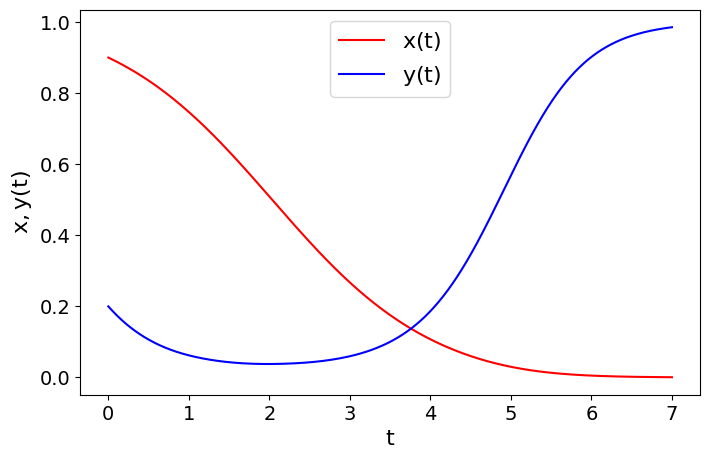

In [6]:
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm x,y(t)$")
plt.plot(Loes.t, Loes.y[0],c="red", label=r"$\rm x(t)$");
plt.plot(Loes.t, Loes.y[1],c="blue", label=r"$\rm y(t)$");
plt.legend(loc='upper center',fontsize=16);

Die obere Grafik zeigt, dass sich die Population nach einiger Zeit zu einem Zustand entwickelt in dem die Spielergruppe A ausschließlich die Strategie 2 (x=0) und die Spielergruppe B ausschließlich die Strategie 1 (y=1) spielt.

Man kann zeigen, dass unabhängig von der gewählten Anfangszusammensetzung $(x_0,y_0)$ der Population  entwickelt sich die Entscheidungswahl der Population in einem evolutionären Eckenspiel stets zu einem stabilen Zustand einer reinen Strategienwahl. 

Im Folgenden werden wir die zeitliche Entwicklung des evolutionären Eckenspiels für zwei weiter Anfangsbedingungen ($(x_0,y_0)=(0.95,0.8)$ und $(x_0,y_0)=(0.7,0.9)$) berechnet und die simulierten Trajektorien der Populationen in einem x-y Diagramm verdeutlichen. Zusätzlich wird im Hintergrund der Abbildung das zugrundeliegende Feldlinienbild der Populationsdynamik veranschaulicht.


In [7]:
x0a = 0.95
y0a = 0.8
Loesa = solve_ivp(DGLsys, [0, 7], [x0a, y0a], t_eval=t_val)

x0b = 0.7
y0b = 0.9
Loesb = solve_ivp(DGLsys, [0, 7], [x0b, y0b], t_eval=t_val)

Das Feldlinienbild der Populationsdynamik eines Bi-Matrix Spiels beschreibt die Richtung und Stärke der zeitlichen Entwicklung einer Population die aus zwei Spielergruppen besteht. Sie ordnet jeder möglichen Strategienwahl der Population (jedem (x,y)-Wert) einen Vektor $\vec{v}(x,y)$ zu. Die Richtung und Länge dieses Vektors sind wie folgt definiert: 

$$
\begin{equation}
\vec{v}(x,y) = 
\left(
\begin{array}{r} 
\frac{d x(t)}{dt} \\ 
\frac{d y(t)}{dt} \\ 
\end{array}
\right)
= 
\left(
\begin{array}{r} 
g_A(x,y) \\ 
g_B(x,y) \\ 
\end{array}
\right)
\,\, , \quad
\left| \vec{v} \right| = \sqrt{g_A^2 + g_B^2}
\end{equation}
$$

$\vec{v}(x,y)$ beschreibt somit in welche Richtung und wie schnell sich die Strategienwahl der Population im Laufe der Zeit verändert.

In [8]:
SY,SX = np.mgrid[0:1:100j,0:1:100j]
SgA = gA(SX,SY,Aa,Ab,Ac,Ad)
SgB = gB(SX,SY,Ba,Bb,Bc,Bd)
speed = np.sqrt(SgA*SgA + SgB*SgB)
colorspeed = speed/speed.max()

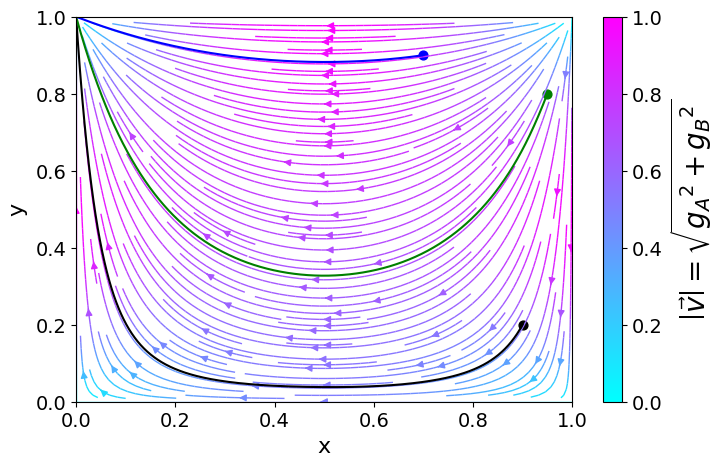

In [9]:
plt.cla()
plt.xlabel(r"$\rm x$")
plt.ylabel(r"$\rm y$")
plt.xlim(0,1)
plt.ylim(0,1)
figure = plt.streamplot(SX,SY,SgA,SgB,density=[2, 2], linewidth=1,color=colorspeed, cmap=plt.cm.cool)
plt.plot(Loes.y[0], Loes.y[1],c="black")
plt.scatter(x0, y0, s=40, marker='o', c="black")
plt.plot(Loesa.y[0], Loesa.y[1],c="green")
plt.scatter(x0a, y0a, s=40, marker='o', c="green")
plt.plot(Loesb.y[0], Loesb.y[1],c="blue")
plt.scatter(x0b, y0b, s=40, marker='o', c="blue")
cbar = plt.colorbar(figure.lines, aspect=20)
cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_A}^2 + {g_B}^2}$',size=20)

Aufgrund der Dominanz der Strategie x=0 für Spielergruppe A verlaufen die Richtungspfeile der Feldlinien nie in positive x-Richtung. Die y-Komponente der Feldlinien kann dagegen in positive oder negative y-Richtung zeigen (Anti-Koordinationsspiel für Spielergruppe B). Unabhängig von der Anfangsbedingung landet die Population stets in der "unsymmetrischen Ecke" (x=0,y=1).

Wir veranschaulichen uns die zeitliche Entwicklung in einer Animation.

In [10]:
import matplotlib.animation as animation
from IPython.display import HTML

In [11]:
step = 20
fig = plt.figure()
ax = fig.gca()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
stream = ax.streamplot(SX,SY,SgA,SgB,density=[2, 2], linewidth=1,color=colorspeed, cmap=plt.cm.cool)
ax.scatter(x0, y0, s=40, marker='o', c="black")
ax.scatter(x0a, y0a, s=40, marker='o', c="green")
ax.scatter(x0b, y0b, s=40, marker='o', c="blue")
cbar = fig.colorbar(stream.lines, ax=ax, aspect=20)
cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_A}^2 + {g_B}^2}$',size=20)

def animate(i):
    ax.scatter(Loes.y[0][step*i], Loes.y[1][step*i], c="black", s=20)
    ax.scatter(Loesa.y[0][step*i], Loesa.y[1][step*i], c="green", s=20)
    ax.scatter(Loesb.y[0][step*i], Loesb.y[1][step*i], c="blue", s=20)
    ax.plot(Loes.y[0][:step*i], Loes.y[1][:step*i], c="black")
    ax.plot(Loesa.y[0][:step*i], Loesa.y[1][:step*i], c="green")
    ax.plot(Loesb.y[0][:step*i], Loesb.y[1][:step*i], c="blue")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=45,interval=200)
plt.close(ani._fig)
HTML(ani.to_html5_video())

Eine weitere Darstellungsmöglichkeit in einem (x,y,t)-Diagramm:

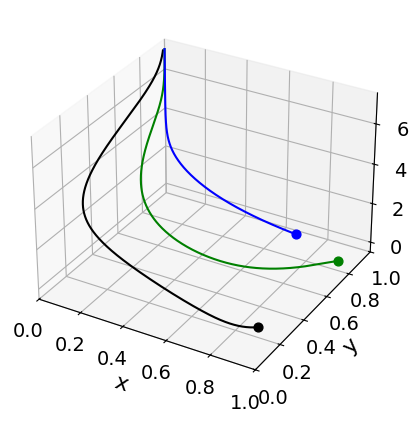

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(Loes.y[0], Loes.y[1], zs=Loes.t, c="black")
ax.scatter(x0, y0, zs=0, s=40, marker='o', c="black")
ax.plot(Loesa.y[0], Loesa.y[1], zs=Loesa.t, c="green")
ax.scatter(x0a, y0a, zs=0, s=40, marker='o', c="green")
ax.plot(Loesb.y[0], Loesb.y[1], zs=Loesb.t, c="blue")
ax.scatter(x0b, y0b, zs=0, s=40, marker='o', c="blue")
#ax.view_init(azim=-65, elev=35)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
ax.set_zlabel(r"$\rm t$");

Die zeitliche Entwicklung kann auch wie folgt in einer Animation verdeutlicht werden:

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
ax.set_zlabel(r"$\rm t$")

def init():   
    ax.plot(Loes.y[0], Loes.y[1], zs=Loes.t, c="black")
    ax.scatter(x0, y0, zs=0, s=40, marker='o', c="black")
    ax.plot(Loesa.y[0], Loesa.y[1], zs=Loes.t, c="green")
    ax.scatter(x0a, y0a, zs=0, s=40, marker='o', c="green")
    ax.plot(Loesb.y[0], Loesb.y[1], zs=Loes.t, c="blue")
    ax.scatter(x0b, y0b, zs=0, s=40, marker='o', c="blue")
    return fig,

def animate(i):
    ax.scatter(Loes.y[0][step*i], Loes.y[1][step*i], zs=Loes.t[step*i], s=10, marker='o', c="black")
    ax.scatter(Loesa.y[0][step*i], Loesa.y[1][step*i], zs=Loesa.t[step*i], s=10, marker='o', c="green")
    ax.scatter(Loesb.y[0][step*i], Loesb.y[1][step*i], zs=Loesb.t[step*i], s=10, marker='o', c="blue")
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=45,interval=400)

plt.close(ani._fig)

HTML(ani.to_html5_video())

### Beispiel II eines Eckenspiels 
Wir betrachten die zeitliche Entwicklung eines weiteren Eckenspiels mit den folgenden Auszahlungswerten der beiden Spielergruppen: 

$$
\begin{equation}
\hat{\bf {\cal \$}}^A =  
\left(
\begin{array}{rr} 
10 & 4 \\ 
12 & 5 \\ 
\end{array}
\right)
\quad , \quad
\hat{\bf {\cal \$}}^B =  
\left(
\begin{array}{rr} 
10 & 7 \\ 
2 & 5 \\ 
\end{array}
\right)
\end{equation}
$$
Es handelt sich hierbei um eine Kombination von einem dominanten Spiel (Spielergruppe A: dominante Strategie 2 (x=0)) mit einem Koordinationsspiel (Spielergruppe B: zwei symmetrische Nash-Gleichgewichte). 

Im Folgenden wird das evolutionäre Eckenspiel (Beispiel II) für die Anfangsbedingungen $(x_0,y_0)=(0.9,0.2)$, $(x_0,y_0)=(0.95,0.8)$ und $(x_0,y_0)=(0.7,0.9)$ dargestellt.

In [14]:
Aa,Ab,Ac,Ad = 10,4,12,5
Ba,Bb,Bc,Bd = 10,7,2,5
x0 = 0.9
y0 = 0.2
Loes = solve_ivp(DGLsys, [0, 7], [x0, y0], t_eval=t_val)

x0a = 0.95
y0a = 0.8
Loesa = solve_ivp(DGLsys, [0, 7], [x0a, y0a], t_eval=t_val)

x0b = 0.7
y0b = 0.9
Loesb = solve_ivp(DGLsys, [0, 7], [x0b, y0b], t_eval=t_val)

In [15]:
SgA = gA(SX,SY,Aa,Ab,Ac,Ad)
SgB = gB(SX,SY,Ba,Bb,Bc,Bd)
speed = np.sqrt(SgA*SgA + SgB*SgB)
colorspeed = speed/speed.max()

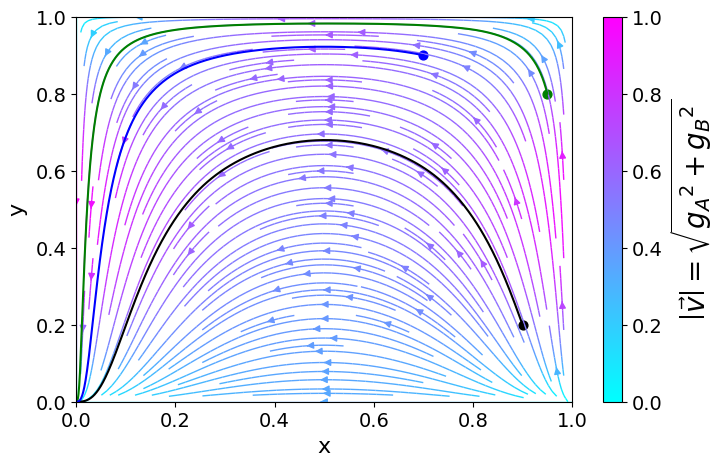

In [16]:
plt.cla()
plt.xlabel(r"$\rm x$")
plt.ylabel(r"$\rm y$")
plt.xlim(0,1)
plt.ylim(0,1)
figure = plt.streamplot(SX,SY,SgA,SgB,density=[2, 2], linewidth=1,color=colorspeed, cmap=plt.cm.cool)
plt.plot(Loes.y[0], Loes.y[1],c="black")
plt.scatter(x0, y0, s=40, marker='o', c="black")
plt.plot(Loesa.y[0], Loesa.y[1],c="green")
plt.scatter(x0a, y0a, s=40, marker='o', c="green")
plt.plot(Loesb.y[0], Loesb.y[1],c="blue")
plt.scatter(x0b, y0b, s=40, marker='o', c="blue")
cbar = plt.colorbar(figure.lines, aspect=20)
cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_A}^2 + {g_B}^2}$',size=20)

Aufgrund der Dominanz der Strategie x=0 für Spielergruppe A verlaufen die Richtungspfeile der Feldlinien nie in positive x-Richtung. Die y-Komponente der Feldlinien kann dagegen in positive oder negative y-Richtung zeigen (Koordinationsspiel für Spielergruppe B). Unabhängig von der Anfangsbedingung landet die Population stets in der "symmetrischen Ecke" (x=0,y=0).

Wir veranschaulichen uns die zeitliche Entwicklung wieder in einer Animation.

In [17]:
step = 20
fig = plt.figure()
ax = fig.gca()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
stream = ax.streamplot(SX,SY,SgA,SgB,density=[2, 2], linewidth=1,color=colorspeed, cmap=plt.cm.cool)
ax.scatter(x0, y0, s=40, marker='o', c="black")
ax.scatter(x0a, y0a, s=40, marker='o', c="green")
ax.scatter(x0b, y0b, s=40, marker='o', c="blue")
cbar = plt.colorbar(stream.lines, ax=ax, aspect=20)
cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_A}^2 + {g_B}^2}$',size=20)

def animate(i):
    ax.scatter(Loes.y[0][step*i], Loes.y[1][step*i], c="black", s=20)
    ax.scatter(Loesa.y[0][step*i], Loesa.y[1][step*i], c="green", s=20)
    ax.scatter(Loesb.y[0][step*i], Loesb.y[1][step*i], c="blue", s=20)
    ax.plot(Loes.y[0][:step*i], Loes.y[1][:step*i], c="black")
    ax.plot(Loesa.y[0][:step*i], Loesa.y[1][:step*i], c="green")
    ax.plot(Loesb.y[0][:step*i], Loesb.y[1][:step*i], c="blue")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=45,interval=200)
plt.close(ani._fig)
HTML(ani.to_html5_video())

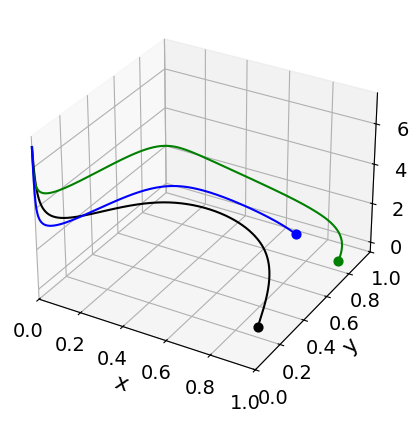

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(Loes.y[0], Loes.y[1], zs=Loes.t, c="black")
ax.scatter(x0, y0, zs=0, s=40, marker='o', c="black")
ax.plot(Loesa.y[0], Loesa.y[1], zs=Loesa.t, c="green")
ax.scatter(x0a, y0a, zs=0, s=40, marker='o', c="green")
ax.plot(Loesb.y[0], Loesb.y[1], zs=Loesb.t, c="blue")
ax.scatter(x0b, y0b, zs=0, s=40, marker='o', c="blue")
#ax.view_init(azim=-65, elev=35)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
ax.set_zlabel(r"$\rm t$");

### Beispiel eines Sattelpunktspiels
Wir betrachten die zeitliche Entwicklung eines Sattelpunktspiels mit den folgenden Auszahlungswerten der beiden Spielergruppen: 

$$
\begin{equation}
\hat{\bf {\cal \$}}^A =  
\left(
\begin{array}{rr} 
8 & 6 \\ 
12 & 5 \\ 
\end{array}
\right)
\quad , \quad
\hat{\bf {\cal \$}}^B =  
\left(
\begin{array}{rr} 
10 & 12 \\ 
9 & 5 \\ 
\end{array}
\right)
\end{equation}
$$
Es handelt sich hierbei um eine Kombination von einem Anti-Koordinationspiel (Spielergruppe A: zwei unsymmetrische Nash-Gleichgewichte) mit einem Anti-Koordinationsspiel (Spielergruppe B: zwei unsymmetrische Nash-Gleichgewichte). 

Im Folgenden wird das evolutionäre Sattelpunktspiel für die Anfangsbedingungen $(x_0,y_0)=(0.99,0.85)$, $(x_0,y_0)=(0.96,0.75)$ und $(x_0,y_0)=(0.3,0.02)$ berechnet:

In [19]:
Aa,Ab,Ac,Ad = 8,6,12,5
Ba,Bb,Bc,Bd = 10,12,9,5
x0 = 0.99
y0 = 0.85
Loes = solve_ivp(DGLsys, [0, 7], [x0, y0], t_eval=t_val)

x0a = 0.96
y0a = 0.75
Loesa = solve_ivp(DGLsys, [0, 7], [x0a, y0a], t_eval=t_val)

x0b = 0.3
y0b = 0.02
Loesb = solve_ivp(DGLsys, [0, 7], [x0b, y0b], t_eval=t_val)

SgA = gA(SX,SY,Aa,Ab,Ac,Ad)
SgB = gB(SX,SY,Ba,Bb,Bc,Bd)
speed = np.sqrt(SgA*SgA + SgB*SgB)
colorspeed = speed/speed.max()

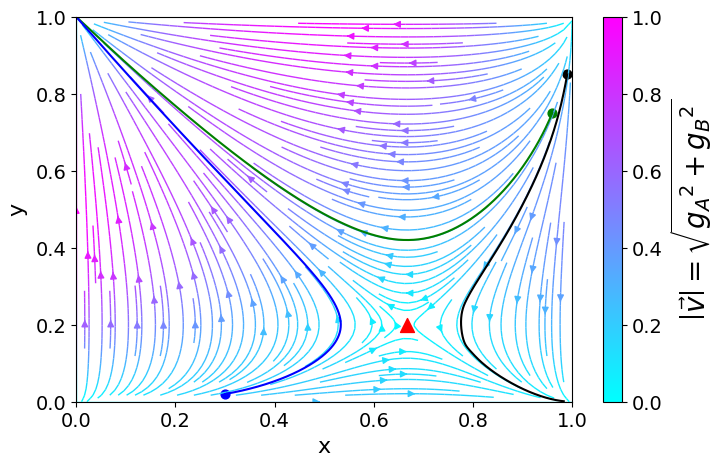

In [20]:
plt.cla()
plt.xlabel(r"$\rm x$")
plt.ylabel(r"$\rm y$")
plt.xlim(0,1)
plt.ylim(0,1)
figure = plt.streamplot(SX,SY,SgA,SgB,density=[2, 2], linewidth=1,color=colorspeed, cmap=plt.cm.cool)
plt.plot(Loes.y[0], Loes.y[1],c="black")
plt.scatter(x0, y0, s=40, marker='o', c="black")
plt.plot(Loesa.y[0], Loesa.y[1],c="green")
plt.scatter(x0a, y0a, s=40, marker='o', c="green")
plt.plot(Loesb.y[0], Loesb.y[1],c="blue")
plt.scatter(x0b, y0b, s=40, marker='o', c="blue")
plt.scatter(2/3, 1/5, s=100, marker='^', c="red")
cbar = plt.colorbar(figure.lines, aspect=20)
cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_A}^2 + {g_B}^2}$',size=20)

Bei einem Sattelpunktspiel, das aus zwei Anti-Koordinationsspielen besteht, existieren zwei evolutionär stabile Strategien ((x=0,y=1) oder (x=1,y=0)) zu denen sich die Population im Laufe der Zeit entwickeln wird. Welche dieser evolutionär stabilen Strategien erreicht wird, hängt von der Anfangsstrategienwahl der Population ab. Auch bei sehr ähnlichen Werten der Anfangsstrategienwahl kann es geschehen, dass sich die Population im Laufe der Zeit zu unterschiedlichen Ecken entwickeln wird (siehe grüne und schwarze Trajektorien). Eine besondere Bedeutung hat der Sattelpunkt des Spiels (siehe rotes Dreieck in der oberen Abbildung). Die Position des Sattelpunktes im x-y Diagramm entspricht dem Wert des gemischten Nash-Gleichgewichtes bzw. lässt sich durch die Nullstellen der Funktionen $g_A(x,y)$ und $g_B(x,y)$ bestimmen.

Wir veranschaulichen uns die zeitliche Entwicklung wieder in einer Animation.

In [21]:
step = 20
fig = plt.figure()
ax = fig.gca()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
stream = ax.streamplot(SX,SY,SgA,SgB,density=[2, 2], linewidth=1,color=colorspeed, cmap=plt.cm.cool)
ax.scatter(x0, y0, s=40, marker='o', c="black")
ax.scatter(x0a, y0a, s=40, marker='o', c="green")
ax.scatter(x0b, y0b, s=40, marker='o', c="blue")
plt.scatter(2/3, 1/5, s=100, marker='^', c="red")
cbar = plt.colorbar(stream.lines, ax=ax, aspect=20)
cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_A}^2 + {g_B}^2}$',size=20)

def animate(i):
    ax.scatter(Loes.y[0][step*i], Loes.y[1][step*i], c="black", s=20)
    ax.scatter(Loesa.y[0][step*i], Loesa.y[1][step*i], c="green", s=20)
    ax.scatter(Loesb.y[0][step*i], Loesb.y[1][step*i], c="blue", s=20)
    ax.plot(Loes.y[0][:step*i], Loes.y[1][:step*i], c="black")
    ax.plot(Loesa.y[0][:step*i], Loesa.y[1][:step*i], c="green")
    ax.plot(Loesb.y[0][:step*i], Loesb.y[1][:step*i], c="blue")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=45,interval=200)
plt.close(ani._fig)
HTML(ani.to_html5_video())

Berechnung des gemischten Nash-Gleichgewichtes $(x^{\star},y^{\star})=(\frac{2}{3},\frac{1}{5})$ (partielle Ableitung der gemischten Auszahlungsflächen verschwindet):

$$
\left. \frac{ \partial {\bf \tilde{\cal \$}}^A(x,y)}{\partial x} \right|_{y=y^{\star}} \stackrel{!}{=}0 \,\, , \quad  
\left. \frac{ \partial {\bf \tilde{\cal \$}}^B(x,y)}{\partial y} \right|_{x=x^{\star}} \stackrel{!}{=}0
$$

In [22]:
from sympy import *
init_printing()

In [23]:
def DollarA(x,y):
    GemischteAuszahlung = Aa*x*y+Ab*x*(1-y)+Ac*(1-x)*y+Ad*(1-x)*(1-y)
    return GemischteAuszahlung
def DollarB(x,y):
    GemischteAuszahlung = Ba*x*y+Bb*x*(1-y)+Bc*(1-x)*y+Bd*(1-x)*(1-y)
    return GemischteAuszahlung

In [24]:
x, y = symbols('x, y')
x_GemNash = symbols('x^\\star')
y_GemNash = symbols('y^\\star')
Gl_GemNashA = Eq(DollarA(x, y_GemNash).diff(x), 0)
Gl_GemNashB = Eq(DollarB(x_GemNash, y).diff(y), 0)
(Gl_GemNashB,Gl_GemNashA)

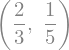

In [25]:
(solve(Gl_GemNashB)[0] , solve(Gl_GemNashA)[0])

Berechnung der Nullstellen der Funktionen $g_A(x,y)$ und $g_B(x,y)$:
Jede der beiden Bedingungen $g_A(x,y)\stackrel{!}{=}0$ und $g_A(x,y)\stackrel{!}{=}0$ liefert eine Kurve $y^\star(x^\star)$ die den Nulldurchgang der Flächen $g_A(x,y)$ und $g_B(x,y)$ beschreibt. Das gemischte Nash-Gleichgewicht befindet sich beim Schnittpunkt der beiden Kurven.

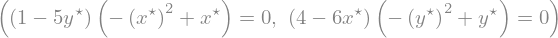

In [26]:
Null_gA = Eq(gA(x_GemNash,y_GemNash,Aa,Ab,Ac,Ad), 0)
Null_gB = Eq(gB(x_GemNash,y_GemNash,Ba,Bb,Bc,Bd), 0)
(Null_gA , Null_gB)

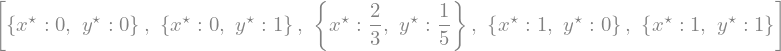

In [27]:
solve([Null_gA , Null_gB])

Eine weitere Darstellungsmöglichkeit in einem (x,y,t)-Diagramm:

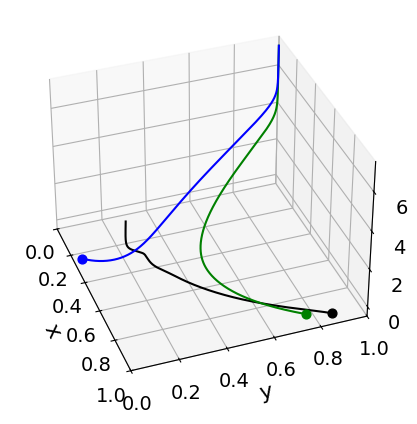

In [28]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(Loes.y[0], Loes.y[1], zs=Loes.t, c="black")
ax.scatter(x0, y0, zs=0, s=40, marker='o', c="black")
ax.plot(Loesa.y[0], Loesa.y[1], zs=Loesa.t, c="green")
ax.scatter(x0a, y0a, zs=0, s=40, marker='o', c="green")
ax.plot(Loesb.y[0], Loesb.y[1], zs=Loesb.t, c="blue")
ax.scatter(x0b, y0b, zs=0, s=40, marker='o', c="blue")
ax.view_init(azim=-20, elev=35)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
ax.set_zlabel(r"$\rm t$");

### Beispiel eines Zentrumspiels
Wir betrachten die zeitliche Entwicklung eines Zentrumspiels mit den folgenden Auszahlungswerten der beiden Spielergruppen: 

$$
\begin{equation}
\hat{\bf {\cal \$}}^A =  
\left(
\begin{array}{rr} 
8 & 6 \\ 
12 & 5 \\ 
\end{array}
\right)
\quad , \quad
\hat{\bf {\cal \$}}^B =  
\left(
\begin{array}{rr} 
10 & 8 \\ 
5 & 12 \\ 
\end{array}
\right)
\end{equation}
$$
Es handelt sich hierbei um eine Kombination von einem Anti-Koordinationspiel (Spielergruppe A: zwei unsymmetrische Nash-Gleichgewichte) mit einem Koordinationsspiel (Spielergruppe B: zwei symmetrische Nash-Gleichgewichte). 

Im Folgenden wird das evolutionäre Zentrumspiel für die Anfangsbedingungen $(x_0,y_0)=(0.5,0.5)$, $(x_0,y_0)=(0.96,0.85)$ und $(x_0,y_0)=(0.7,0.4)$ berechnet:

In [29]:
Aa,Ab,Ac,Ad = 8,6,12,5
Ba,Bb,Bc,Bd = 10,8,5,12
t_val = np.linspace(0, 21.3, 1000)
x0 = 0.5
y0 = 0.5
Loes = solve_ivp(DGLsys, [0, 21.3], [x0, y0], t_eval=t_val)

x0a = 0.96
y0a = 0.85
Loesa = solve_ivp(DGLsys, [0, 21.3], [x0a, y0a], t_eval=t_val)

x0b = 0.7
y0b = 0.4
Loesb = solve_ivp(DGLsys, [0, 21.3], [x0b, y0b], t_eval=t_val)

SgA = gA(SX,SY,Aa,Ab,Ac,Ad)
SgB = gB(SX,SY,Ba,Bb,Bc,Bd)
speed = np.sqrt(SgA*SgA + SgB*SgB)
colorspeed = speed/speed.max()

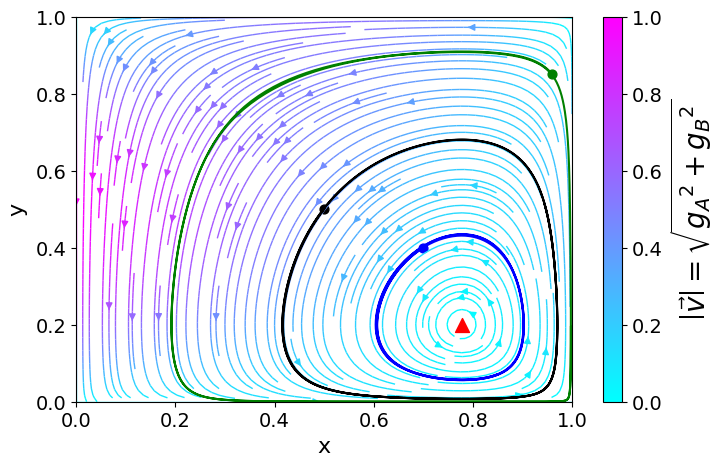

In [30]:
plt.cla()
plt.xlabel(r"$\rm x$")
plt.ylabel(r"$\rm y$")
plt.xlim(0,1)
plt.ylim(0,1)
figure = plt.streamplot(SX,SY,SgA,SgB,density=[2, 2], linewidth=1,color=colorspeed, cmap=plt.cm.cool)
plt.plot(Loes.y[0], Loes.y[1],c="black")
plt.scatter(x0, y0, s=40, marker='o', c="black")
plt.plot(Loesa.y[0], Loesa.y[1],c="green")
plt.scatter(x0a, y0a, s=40, marker='o', c="green")
plt.plot(Loesb.y[0], Loesb.y[1],c="blue")
plt.scatter(x0b, y0b, s=40, marker='o', c="blue")
plt.scatter(7/9, 1/5, s=100, marker='^', c="red")
cbar = plt.colorbar(figure.lines, aspect=20)
cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_A}^2 + {g_B}^2}$',size=20)

Bei einem Zentrumsspiel existiert keine evolutionär stabile Strategie, da die Strategienwahl der Population sich im Laufe der Zeit ständig verändert und um ein Zentrum (siehe rotes Dreieck in der oberen Abbildung) kreist. Die Position dieses Zentrums im x-y Diagramm (hier speziell $(x^{\star},y^{\star})=(\frac{7}{9},\frac{1}{5})$) entspricht dem Wert des gemischten Nash-Gleichgewichtes bzw. lässt sich durch die Nullstellen der Funktionen $g_A(x,y)$ und $g_B(x,y)$ bestimmen.

In [31]:
Gl_GemNashA = Eq(DollarA(x, y_GemNash).diff(x), 0)
Gl_GemNashB = Eq(DollarB(x_GemNash, y).diff(y), 0)
(Gl_GemNashB , Gl_GemNashA)

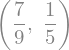

In [32]:
(solve(Gl_GemNashB)[0] , solve(Gl_GemNashA)[0])

Wir veranschaulichen uns die zeitliche Entwicklung wieder in einer Animation.

In [33]:
step = 10
fig = plt.figure()
ax = fig.gca()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
stream = ax.streamplot(SX,SY,SgA,SgB,density=[2, 2], linewidth=1,color=colorspeed, cmap=plt.cm.cool)
ax.scatter(x0, y0, s=40, marker='o', c="black")
ax.scatter(x0a, y0a, s=40, marker='o', c="green")
ax.scatter(x0b, y0b, s=40, marker='o', c="blue")
ax.scatter(7/9, 1/5, s=100, marker='^', c="red")
cbar = plt.colorbar(stream.lines, ax=ax, aspect=20)
cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_A}^2 + {g_B}^2}$',size=20)

def animate(i):
    ax.scatter(Loes.y[0][step*i], Loes.y[1][step*i], c="black", s=20)
    ax.scatter(Loesa.y[0][step*i], Loesa.y[1][step*i], c="green", s=20)
    ax.scatter(Loesb.y[0][step*i], Loesb.y[1][step*i], c="blue", s=20)
    ax.plot(Loes.y[0][:step*i], Loes.y[1][:step*i], c="black")
    ax.plot(Loesa.y[0][:step*i], Loesa.y[1][:step*i], c="green")
    ax.plot(Loesb.y[0][:step*i], Loesb.y[1][:step*i], c="blue")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=55,interval=200)
plt.close(ani._fig)
HTML(ani.to_html5_video())

Die zeitliche Entwicklung lässt sich auch wieder in einem (x,y,t)-Diagramm darstellen:

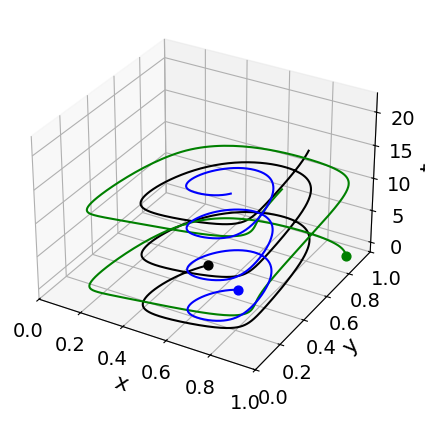

In [34]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(Loes.y[0], Loes.y[1], zs=Loes.t, c="black")
ax.scatter(x0, y0, zs=0, s=40, marker='o', c="black")
ax.plot(Loesa.y[0], Loesa.y[1], zs=Loesa.t, c="green")
ax.scatter(x0a, y0a, zs=0, s=40, marker='o', c="green")
ax.plot(Loesb.y[0], Loesb.y[1], zs=Loesb.t, c="blue")
ax.scatter(x0b, y0b, zs=0, s=40, marker='o', c="blue")
#ax.view_init(azim=-20, elev=35)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
ax.set_zlabel(r"$\rm t$");